In [1]:
import pandas as pd

df = pd.read_csv('./datasets/personal_infomation.csv', index_col=0)

In [2]:
age_df = pd.DataFrame()
for bottom in [10, 20, 30, 40, 50, 60, 70, 80]:
    age_df[f'{bottom}<age<={bottom+10}'] = ((df['年齢'] > bottom) & (df['年齢'] <= bottom+10)).astype('int8')

<BarContainer object of 4 artists>

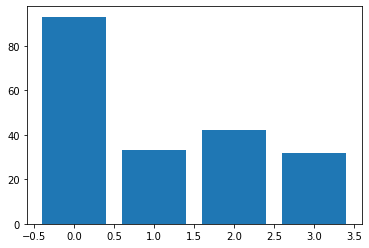

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(age_df)

bar_x, bar_y = np.unique(kmeans.labels_, return_counts=True)
plt.bar(bar_x, bar_y)

In [4]:
rdf = age_df.copy()
rdf['cls'] = kmeans.labels_

In [5]:
ave_by_cls = []
for i in range(0, 4):
    ave_by_cls.append(np.average(rdf[rdf['cls'] == i].drop('cls', axis=1), axis=0))
ave_by_cls = np.array(ave_by_cls)

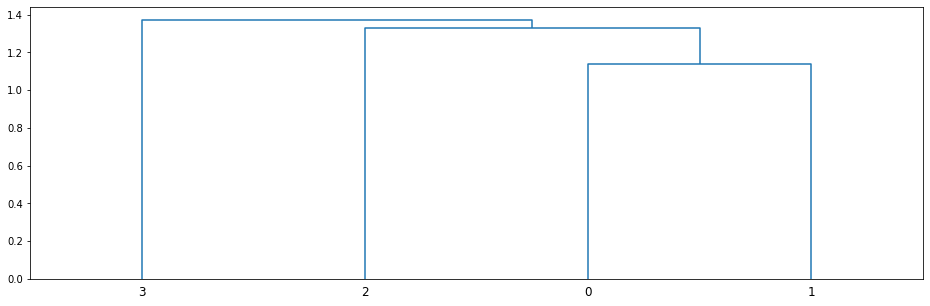

In [6]:
from scipy.cluster.hierarchy import linkage, dendrogram

z = linkage(ave_by_cls, 'ward')

fig = plt.subplots(figsize=(16, 5))
dn = dendrogram(z)

In [7]:
rdf[(rdf['cls'] == 0)]

,10<age<=20,20<age<=30,30<age<=40,40<age<=50,50<age<=60,60<age<=70,70<age<=80,80<age<=90,cls
連番,,,,,,,,,
4,0,0,1,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0
10,0,0,0,1,0,0,0,0,0
13,0,0,1,0,0,0,0,0,0
16,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
192,0,0,0,0,0,1,0,0,0
193,0,0,0,1,0,0,0,0,0
195,0,0,0,0,0,1,0,0,0


## 結論

ダミーデータのk-meansクラスタリングは精度よくなさそう。